<a href="https://colab.research.google.com/github/fabiooshiro/DBFFile/blob/master/dcgan/DC-GAN-Celeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Useful Libraries

In [11]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [12]:
import tensorflow
print (tensorflow.__version__)

2.8.0


# Download and Unzip dataset

In [1]:
from google.colab import drive
!wget https://s3.amazonaws.com/calindra.tests/johnfoot/players.zip
drive.mount('/content/gdrive')
!unzip ./players.zip -d /content/

--2022-02-16 12:24:24--  https://s3.amazonaws.com/calindra.tests/johnfoot/players.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.40.138
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.40.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 485384352 (463M) [application/zip]
Saving to: ‘players.zip’

players.zip         100%[===================>] 462.90M  46.9MB/s    in 11s     

2022-02-16 12:24:35 (43.3 MB/s) - ‘players.zip’ saved [485384352/485384352]

Mounted at /content/gdrive


In [8]:
!rm /content/__MACOSX/players/._players-256-268.png
!ls -la /content/players/

Streaming output truncated to the last 5000 lines.
-rw-r--r-- 1 root root  60128 Feb 15 14:35 players-246-920.png
-rw-r--r-- 1 root root  56408 Feb 15 09:24 players-246-923.png
-rw-r--r-- 1 root root  59520 Feb 15 14:35 players-246-928.png
-rw-r--r-- 1 root root  58302 Feb 15 10:56 players-246-929.png
-rw-r--r-- 1 root root  52727 Feb 15 14:35 players-246-930.png
-rw-r--r-- 1 root root  67528 Feb 15 14:35 players-246-931.png
-rw-r--r-- 1 root root  55507 Feb 15 14:35 players-246-936.png
-rw-r--r-- 1 root root  54752 Feb 15 10:56 players-246-937.png
-rw-r--r-- 1 root root  54435 Feb 15 14:35 players-246-946.png
-rw-r--r-- 1 root root  59094 Feb 15 14:35 players-246-947.png
-rw-r--r-- 1 root root  48071 Feb 15 14:35 players-246-950.png
-rw-r--r-- 1 root root  58751 Feb 15 14:35 players-246-951.png
-rw-r--r-- 1 root root  51949 Feb 15 14:34 players-246-954.png
-rw-r--r-- 1 root root  54538 Feb 15 14:34 players-246-955.png
-rw-r--r-- 1 root root  69014 Feb 15 14:34 players-246-956.png
-rw-

In [9]:
import glob
files = glob.glob('/content/players/*.png')
len(files)

8585

In [13]:
for file in files[:10]:
    anime_img = cv2.imread(file)
    print (anime_img.shape)

(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)


# Display samples

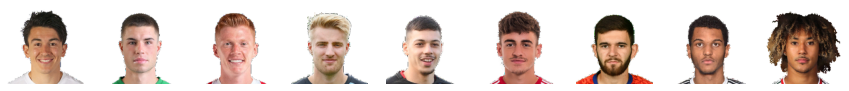

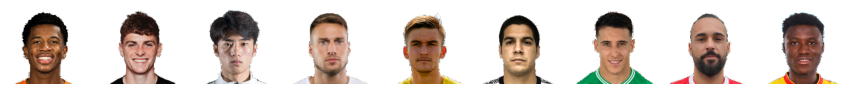

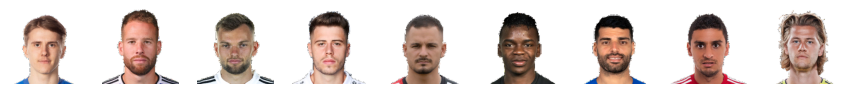

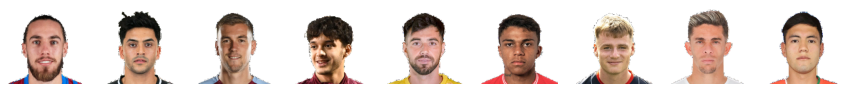

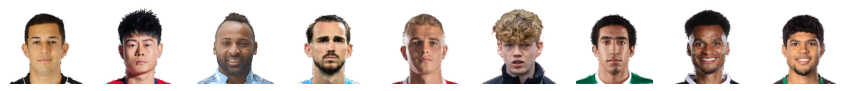

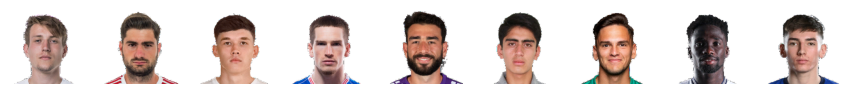

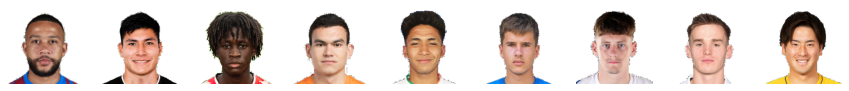

In [49]:
for k in range(9):
    plt.figure(figsize=(15, 15))
    for j in range(9):
        f = np.random.choice(files)
        celeb_img = cv2.imread(f, cv2.IMREAD_UNCHANGED)
        trans_mask = celeb_img[:,:,3] == 0
        celeb_img[trans_mask] = [255, 255, 255, 255]
        celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(990 + 1 + j)
        plt.imshow(celeb_img)
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

# Data Preparation and Normalization

In [50]:
from tqdm import tqdm_notebook

images = []
for file in tqdm_notebook(files):
    celeb_img = cv2.imread(f, cv2.IMREAD_UNCHANGED)
    trans_mask = celeb_img[:,:,3] == 0
    celeb_img[trans_mask] = [255, 255, 255, 255]
    celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
    celeb_img = cv2.resize(celeb_img, (100, 100))
    images.append((celeb_img-127.5)/127.5)

images = np.array(images)
print (images.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/8585 [00:00<?, ?it/s]

(8585, 100, 100, 3)


# Define Generator Model

In [51]:
random_input = tensorflow.keras.layers.Input(shape = 100)

x = tensorflow.keras.layers.Dense(64 * 7 * 7)(random_input)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Reshape((7, 7, 64))(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)

x = tensorflow.keras.layers.Conv2D(filters=3, kernel_size=(3,3), padding='same')(x)
generated_image = tensorflow.keras.layers.Activation('tanh')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 3136)              316736    
                                                                 
 activation_7 (Activation)   (None, 3136)              0         
                                                                 
 batch_normalization_9 (Batc  (None, 3136)             12544     
 hNormalization)                                                 
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 14, 14, 128)      204928    
 ranspose)                                                 

# Define Discriminator

In [52]:
image_input = tensorflow.keras.layers.Input(shape=(56, 56, 3))

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=2, padding='same')(image_input)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2, padding='same')(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=2, padding='same')(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same')(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(5,5))(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3))(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Flatten()(x)

x = tensorflow.keras.layers.Dense(1)(x)
real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 56, 56, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 28, 28, 128)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        204864    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_13 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                           

In [53]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Define combined model: DCGAN

In [54]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

dcgan_model = tensorflow.keras.models.Model(random_input, d_output)
dcgan_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 model_3 (Functional)        (None, 56, 56, 3)         1768387   
                                                                 
 model_4 (Functional)        (None, 1)                 904961    
                                                                 
Total params: 2,673,348
Trainable params: 1,761,347
Non-trainable params: 912,001
_________________________________________________________________


# Compiling Models

In [55]:
dcgan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [56]:
def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_files = np.random.choice(files, size=batch_size)
    images = []
    for file in random_files:
        celeb_img = cv2.imread(f, cv2.IMREAD_UNCHANGED)
        trans_mask = celeb_img[:,:,3] == 0
        celeb_img[trans_mask] = [255, 255, 255, 255]
        celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
        celeb_img = cv2.resize(celeb_img, (56, 56))
        images.append((celeb_img-127.5)/127.5)
    real_images = np.array(images)
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(11, 11))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        fake_samples = (fake_samples+1.0)/2.0
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j])
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

# Training DCGAN on Celeb Faces

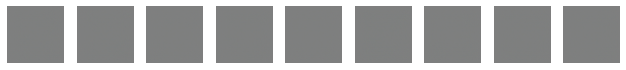

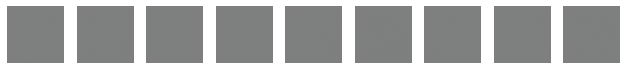

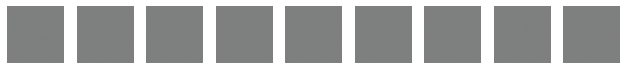

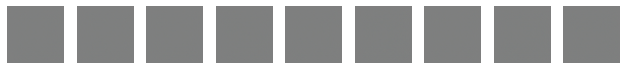

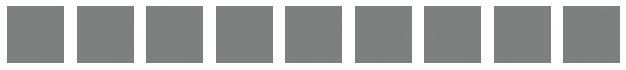

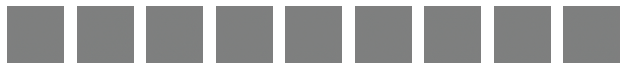

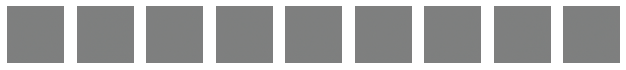

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/GAN_datasets/celeb_model_0/assets
Epoch:0, Step:0, D-Loss:2.627, D-Acc:0.000, G-Loss:0.668
Epoch:0, Step:50, D-Loss:0.004, D-Acc:100.000, G-Loss:2.778
Epoch:0, Step:100, D-Loss:0.003, D-Acc:100.000, G-Loss:4.633


In [ ]:
epochs = 200
batch_size = 100
steps = 500
noise_size = 100

for i in range(0, epochs):
    if (i%5 == 0):
        show_generator_results(generator_network)
        generator_network.save('/content/gdrive/MyDrive/GAN_datasets/celeb_model_'+ str(i))
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = dcgan_model.train_on_batch(gan_input, gan_output)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            

# Show Results

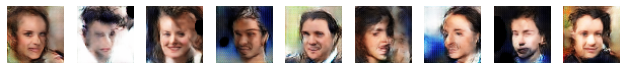

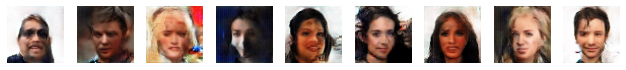

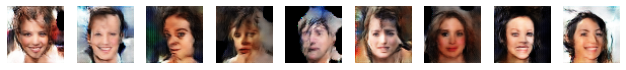

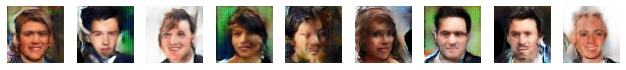

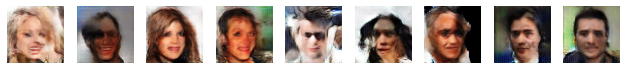

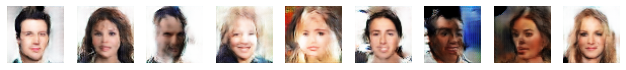

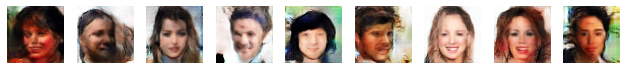

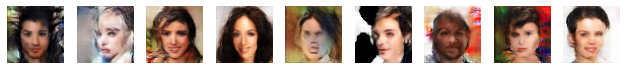

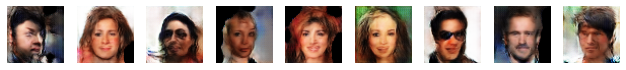

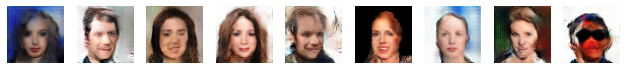

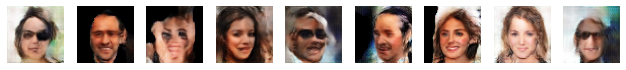

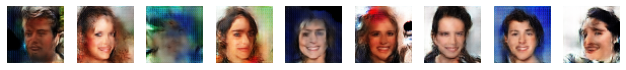

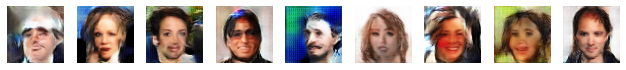

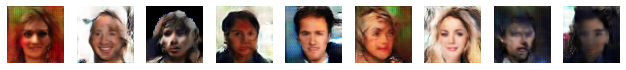

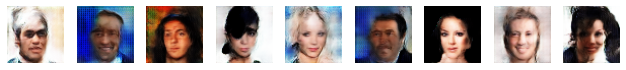

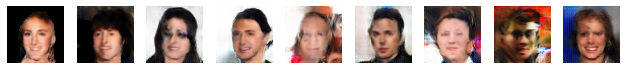

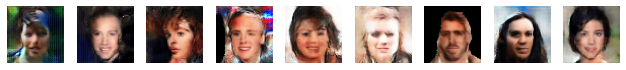

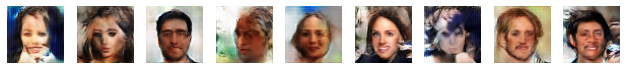

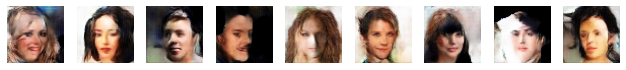

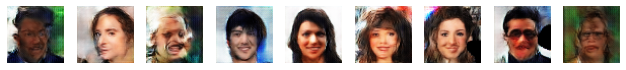

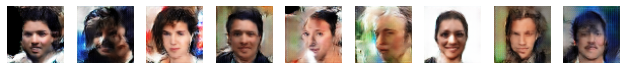

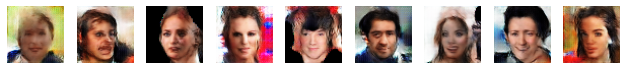

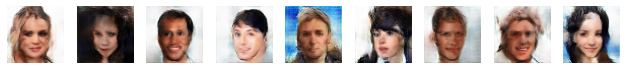

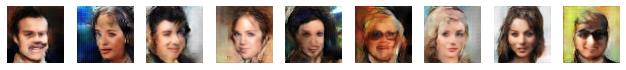

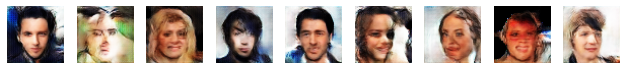

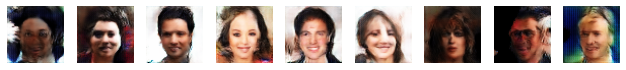

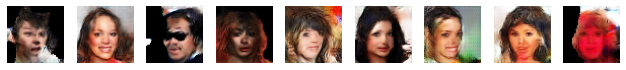

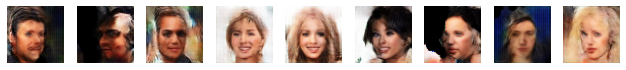

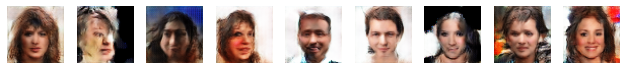

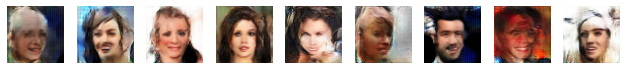

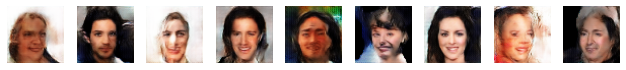

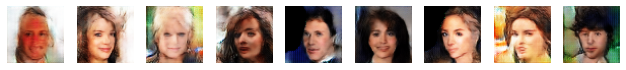

In [ ]:
#Generating Unlimited samples
noise_size=100
generator_network = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/GAN_datasets/celeb_model_new')
for i in range(5):
    show_generator_results(generator_network)